# PYTHON PROGRAMMING FUNDAMENTALS 


# STEP 0: 데이터셋

- 데이터는 미국의 아보카도 리테일 데이터 입니다. (weekly 2018 retail scan data for National retail volume (units) and price)
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. - 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost

컬럼 설명 :

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold 
- 4046 - Total number of avocados with PLU 4046 sold - PLU는 농산물 코드입니다
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

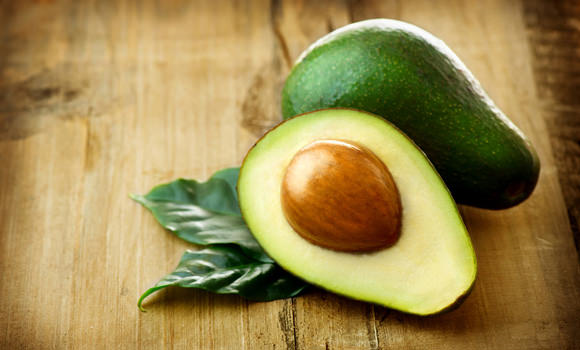

# STEP 1: 데이터 임포팅

##### 아나콘다 프롬프트를 실행합니다.

     
- 콘다로 설치합니다. : 

    conda install pystan
    
    conda install -c conda-forge fbprophet
    
    

- ( 다른 설치 )

    pip install fbprophet
    
    

##### Prophet 은 페이스북에서 만든 오픈소스소프트웨어 입니다.  

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet 시계열과 관련있는 데이터를 처리하는데 최고입니다. 

- 참고 : https://research.fb.com/prophet-forecasting-at-scale/
- 참고 : https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [1]:
# import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import seaborn as sb
from fbprophet import Prophet


### 위를 실행했을때, 다음과 같은 에러 발생하면,
ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.

### pip install --upgrade plotly  실행.

# 실습 1. Date 컬럼으로 정렬하기 (데이터를 확인해 보면, Date 가 뒤죽박죽입니다.)

In [2]:
avocado_df = pd.read_csv('avocado.csv')

In [3]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
avocado_df.sort_values(by='Date', ascending=True, inplace = True)

In [6]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [7]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


# 실습 2. Date를 x축, AveragePrice를 y축으로 plot 그리세요.

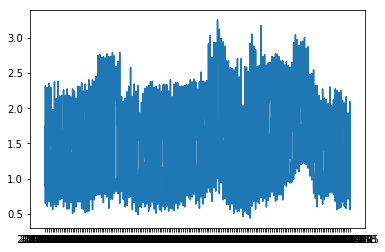

In [8]:
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

# 실습 3. 각 region 별로 몇개의 데이터가 있는지를 그래프로 나타내세요.

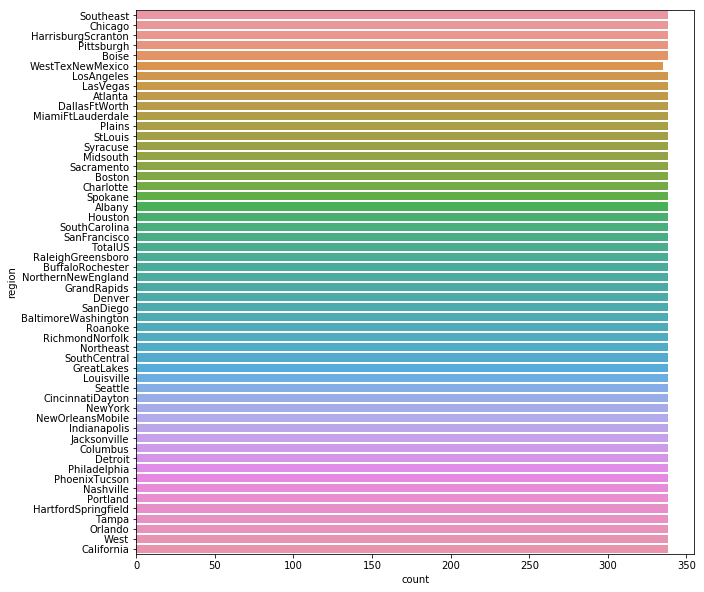

In [11]:
plt.figure(figsize=(10,10))
sb.countplot(data = avocado_df, y = 'region')

# 실습 4. 각 년도별로 몇개의 데이터가 있는지를 그래프로 나타내세요.

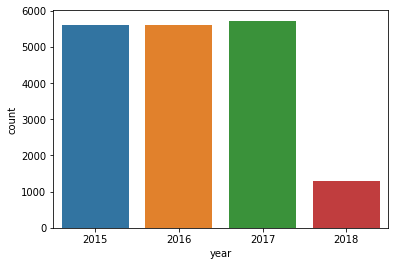

In [12]:
sb.countplot(data=avocado_df, x = 'year')

In [13]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


# 실습 5. Date 와 AveragePrice 두개의 열만 포함하는 데이터프레임을 만드세요.

In [16]:
avocado_prophet_df = avocado_df[  ['Date', 'AveragePrice'] ]

In [17]:
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# Prophet 를 사용하여 예측하려 합니다. 그러려면, 컬럼명을 다음처럼 꼭 바꿔줘야 합니다.

# 실습 6. Date컬럼명을 ds로,  AveragePrice컬럼명을  y로 리네임(rename) 하세요.

In [18]:
avocado_prophet_df.rename( columns={'Date':'ds', 'AveragePrice':'y'}, 
                          inplace=True)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# .실습 7. Prophet 를 이용해서, 학습 시킵니다.

In [20]:
m = Prophet()

In [21]:
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# .실습 8. Prophet 를 이용해서, 미래를 예측합니다.

In [22]:
avocado_prophet_df.tail()

,ds,y
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70
8814,2018-03-25,1.34


In [18]:
# 2018년 3월 25일 이후, 365일치 데이터를 예측

In [23]:
future = m.make_future_dataframe(periods=365)

In [24]:
future.tail()

,ds
18609,2019-03-21
18610,2019-03-22
18611,2019-03-23
18612,2019-03-24
18613,2019-03-25


In [25]:
future.shape

(18614, 1)

In [26]:
forecast = m.predict(future)

In [27]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498604,0.924758,1.871337,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
1,2015-01-04,1.498604,0.898693,1.882151,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
2,2015-01-04,1.498604,0.929915,1.886899,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
3,2015-01-04,1.498604,0.912380,1.872617,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119
4,2015-01-04,1.498604,0.891812,1.828852,1.498604,1.498604,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,-0.113484,0.0,0.0,0.0,1.385119


In [28]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
18609,2019-03-21,1.163836,0.571581,1.629634,0.984241,1.339613,-0.086298,-0.086298,-0.086298,-0.086298,-0.086298,-0.086298,0.0,0.0,0.0,1.077538
18610,2019-03-22,1.163109,0.555342,1.562746,0.982796,1.339774,-0.084617,-0.084617,-0.084617,-0.084617,-0.084617,-0.084617,0.0,0.0,0.0,1.078492
18611,2019-03-23,1.162382,0.577462,1.595377,0.981351,1.339927,-0.082661,-0.082661,-0.082661,-0.082661,-0.082661,-0.082661,0.0,0.0,0.0,1.079721
18612,2019-03-24,1.161655,0.554490,1.578231,0.980005,1.340045,-0.080451,-0.080451,-0.080451,-0.080451,-0.080451,-0.080451,0.0,0.0,0.0,1.081204
18613,2019-03-25,1.160928,0.590681,1.555603,0.978698,1.339549,-0.078014,-0.078014,-0.078014,-0.078014,-0.078014,-0.078014,0.0,0.0,0.0,1.082914


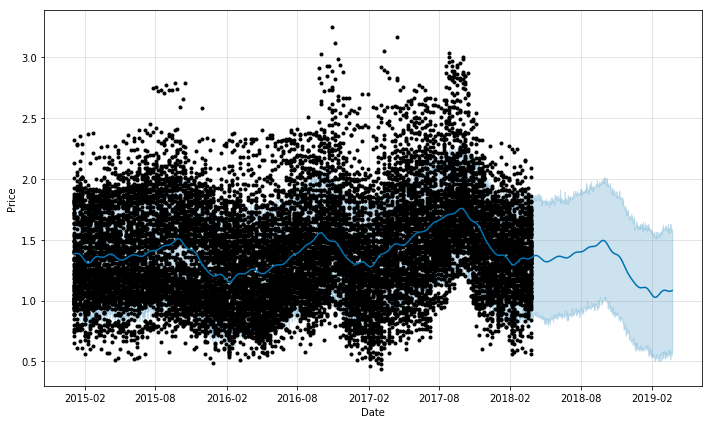

In [30]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

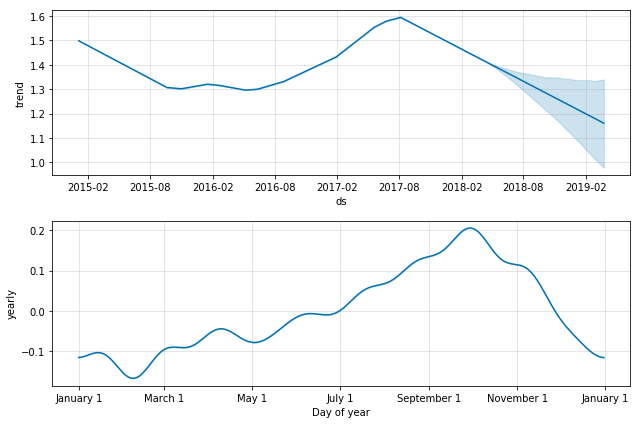

In [31]:
figure2 = m.plot_components(forecast)

# 실습 8. region 이 West 인 데이터만 가져옵니다.

In [32]:
avocado_df_sample = avocado_df[ avocado_df['region'] =='West' ]

In [33]:
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


# 실습 9. Date로 정렬합니다.

In [34]:
avocado_df_sample.sort_values(by='Date', ascending=True, inplace=True)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [35]:
avocado_df_sample.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West
18225,0,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018,West


# 실습 10. plot을 그립니다.  Date가 x축, AveragePrice 를 y축으로 그립니다.

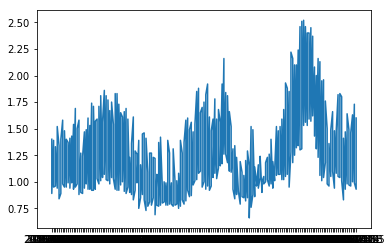

In [36]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

# 실습 11. 예측을 위해 컬럼명을 바꿉니다. Date 를 ds 로, AveragePrice 를 y 로 바꿉니다.

In [37]:
avocado_df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'},
                        inplace = True)

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# 실습 12. 데이터를 학습시킨 후, 365일치 데이터를 만든 후, forecast 변수에 예측한 값을 저장 하세요.

In [38]:
m = Prophet()

In [39]:
m.fit(avocado_df_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = m.make_future_dataframe(periods=365)

In [41]:
future.tail()

,ds
698,2019-03-21
699,2019-03-22
700,2019-03-23
701,2019-03-24
702,2019-03-25


In [42]:
forecast = m.predict(future)

# 실습 13. Prophet 의 plot 함수로 화면에 그래프로 나타내세요. (xlabel='Date', ylabel='Price' )

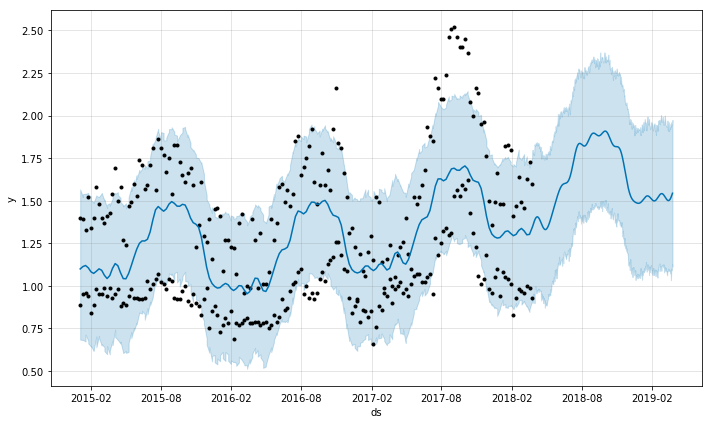

In [43]:
figure = m.plot(forecast)

# 실습 14. 월별, 년도별 예측 그래프를 보여주세요.

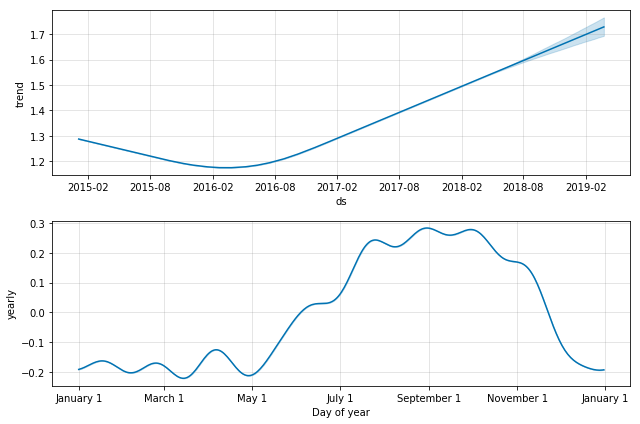

In [44]:
figure2 = m.plot_components(forecast)

# GREAT JOB, KEEP UP THE GREAT WORK!